In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import json
import requests

[Open Tree of Life API Documentation](https://github.com/OpenTreeOfLife/germinator/wiki/Open-Tree-of-Life-Web-APIs)

In [3]:
def otl_request(path, **kwargs):
    data_json = json.dumps(kwargs)
    r = requests.post('https://api.opentreeoflife.org/v3/' + path, data = data_json)
    return json.loads(r.text)

def print_otl_request(path, **kwargs):
    print json.dumps(otl_request(path, **kwargs), indent = 4)

In [4]:
sci_names = {
    "antelope": "eudorcas thomsonii",
    "grizzly bear": "ursus arctos horribilis",
    "killer whale": "orcinus orca",
    "beaver": "castor canadensis",
    "dalmatian": "canis lupus familiaris",  # more specific?
    "persian cat": "felis catus",  # more specific
    "horse": "equus ferus caballus",
    "german shepherd": "canis lupus familiaris",  # more specific?
    "blue whale": "balaenoptera musculus",
    "siamese cat": "felis catus",  # more specific?
    "skunk": "mephitidae",
    "mole": "talpidae",
    "tiger": "panthera tigris",
    "hippopotamus": "hippopotamus amphibius",
    "leopard": "panthera pardus",
    "moose": "alces alces",
    "spider monkey": "ateles",
    "humpback whale": "megaptera novaeangliae",
    "elephant": "loxodonta africana",
    "gorilla": "gorilla gorilla",
    "ox": "bos taurus",  # more specific?
    "fox": "vulpes vulpes",
    "sheep": "ovis aries",
    "seal": "phocidae",
    "chimpanzee": "pan",  # troglodytes",
    "hamster": "mesocricetus",
    "squirrel": "sciuridae",
    "rhinoceros": "rhinocerotidae",
    "rabbit": "oryctolagus",
    "bat": "lasiurus blossevillii",
    "giraffe": "giraffa camelopardalis",
    "wolf": "canis lupus arctos",
    "chihuahua": "canis lupus familiaris",  # more specific?
    "rat": "rattus rattus",
    "weasel": "mustela nivalis",
    "otter": "lutrinae",
    "buffalo": "bison bison",
    "zebra": "equus quagga",
    "giant panda": "ailuropoda melanoleuca",
    "deer": "odocoileus virginianus",
    "bobcat": "lynx rufus",
    "pig": "sus scrofa domesticus",
    "lion": "panthera leo",
    "mouse": "mus musculus",
    "polar bear": "ursus maritimus",
    "collie": "canis lupus familiaris",  # more specific?
    "walrus": "odobenus rosmarus",
    "raccoon": "procyon lotor",
    "cow": "bos taurus",  # more specific?
    "dolphin": "tursiops truncatus",
}

In [5]:
animals_filename = "../../../2016-a-winter/cse250b-learning-algos/hw6/Animals_with_Attributes/classes.txt"
with open(animals_filename) as f:
    animals = [line.split()[1].replace('+', ' ') for line in f]

In [6]:
for a in animals:
    assert a in sci_names

In [7]:
from IPython.display import clear_output

In [8]:
ott_ids = {}
ott_result = otl_request('/tnrs/match_names', names = sci_names.values())
for r in ott_result["results"]:
    m = r["matches"][0]
    ott_ids[m["search_string"]] = m["taxon"]["ott_id"]

In [9]:
from collections import defaultdict

In [10]:
names_by_ott_id = defaultdict(list)
for a in sorted(animals):
    ott_id = ott_ids[sci_names[a]]
    print "{:20s}: {:30s} ({})".format(a, sci_names[a], ott_id)
    names_by_ott_id[ott_id].append(a)

antelope            : eudorcas thomsonii             (702522)
bat                 : lasiurus blossevillii          (362948)
beaver              : castor canadensis              (886085)
blue whale          : balaenoptera musculus          (226190)
bobcat              : lynx rufus                     (507545)
buffalo             : bison bison                    (907693)
chihuahua           : canis lupus familiaris         (247333)
chimpanzee          : pan                            (417957)
collie              : canis lupus familiaris         (247333)
cow                 : bos taurus                     (490099)
dalmatian           : canis lupus familiaris         (247333)
deer                : odocoileus virginianus         (410145)
dolphin             : tursiops truncatus             (124230)
elephant            : loxodonta africana             (541936)
fox                 : vulpes vulpes                  (821964)
german shepherd     : canis lupus familiaris         (247333)
giant pa

In [11]:
newick_subtree = otl_request('/tree_of_life/induced_subtree', ott_ids = ott_ids.values())['newick']
print newick_subtree

((((((((Mephitidae_ott445986,(Procyon_lotor_ott348040,(Lutrinae_ott306281,Mustela_nivalis_ott354525))),((Ailuropoda_melanoleuca_ott872573,(Ursus_maritimus_ott10732,Ursus_arctos_horribilis_ott350099))Ursidae_ott297458,(Odobenus_rosmarus_ott749644,Phocidae_ott749626))),(Vulpes_vulpes_ott821964,(Canis_lupus_familiaris_ott247333,Canis_lupus_arctos_ott5340002)Canis_lupus_ott247341))Caniformia_ott827263,((Felis_catus_ott563166,Lynx_rufus_ott507545),((Panthera_leo_ott563151,Panthera_pardus_ott42324),Panthera_tigris_ott42314)Panthera_ott563154)Felidae_ott563159)Carnivora_ott44565,(((((((Balaenoptera_musculus_ott226190,Megaptera_novaeangliae_ott226198)Balaenopteridae_ott800326,(Tursiops_truncatus_ott124230,Orcinus_orca_ott124215)Delphinidae_ott698406)Cetacea_ott698424,Hippopotamus_amphibius_ott510762),(((Eudorcas_thomsonii_ott702522,(Bison_bison_ott907693,Bos_taurus_ott490099)Bovinae_ott346071,Ovis_aries_ott70819)Bovidae_ott768677,(Odocoileus_virginianus_ott410145,Alces_alces_ott460509)Odocoile

In [12]:
import re

In [14]:
import context

In [15]:
from hier_clust import linkage_util
from hier_clust.tree_util import Tree

In [16]:
def parse_newick(newick):
    result = parse_newick_helper(newick)
    if len(result) == 0:
        return result
    elif len(result) == 1:
        return result[0]
    else:
        raise Exception("Found multiple top-level trees")

def parse_newick_helper(newick):
    #print "DEBUG: {}".format(newick)
    children = []
    current_str = ''
    nesting = 0
    for char in newick:
        if char == '(':
            nesting += 1
            current_str += char
        elif char == ')':
            nesting -= 1
            current_str += char
        elif char == ',' and nesting == 0:
            children.append(current_str)
            current_str = ''
        else:
            current_str += char
    if current_str != '':
        children.append(current_str)
    if len(children) == 1:
        if not children[0].startswith('('):
            m = re.match(r'.*_ott(.*)', children[0])
            if m:
                ott_id = int(m.group(1))
                if ott_id in names_by_ott_id:
                    names = names_by_ott_id[ott_id]
                    subtrees = []
                    for name in names:
                        index = animals.index(name)
                        subtrees.append(Tree.leaf(dict(name = name, orig_indices=[index])))
                    return subtrees
            return [Tree.leaf(dict(name = children[0], orig_indices = []))]
        return [nester(children[0])]
    else:
        result = []
        for child in children:
            result.extend(parse_newick_helper(child))
        return result 

def combine_results(node_name, results):
    if len(results) <= 2:
        orig_indices = []
        for t in results:
            orig_indices += t.data["orig_indices"]
        orig_indices = list(set(orig_indices))
        return Tree(data = dict(name = node_name, orig_indices = orig_indices), children = results)
    else:
        first_combined = combine_results(node_name, results[:2])
        return combine_results(node_name + "*", [first_combined] + results[2:])

def nester(newick):
    m = re.search(r'\)(\w*);?$', newick)
    assert bool(m)
    node_name = m.group(1)
    if node_name == '':
        node_name = 'UNNAMED'
    pos = m.start()
    substr = newick[1:pos]
    child_results = parse_newick_helper(substr)
    return combine_results(node_name, child_results)

In [17]:
def induced_subtree(names, ax = None):
    ids = [ott_ids[sci_names[name]] for name in names]
    newick = otl_request('/tree_of_life/induced_subtree', ott_ids = ids)['newick']
    tree = parse_newick(newick)
    if ax is not None:
        linkage = linkage_util.get_linkage(tree)
        dendrogram(linkage, color_threshold = 0, orientation = 'left', ax = ax)
    return tree

In [18]:
temp_names = ['fox', 'dalmatian']
otl_request('/tree_of_life/induced_subtree', ott_ids = [ott_ids[sci_names[name]] for name in temp_names])

{u'newick': u'(Canis_lupus_familiaris_ott247333,Vulpes_vulpes_ott821964);',
 u'supporting_studies': [u'ot_278']}

In [19]:
print induced_subtree(['fox', 'dalmatian']).str_display()

Tree(data = {'orig_indices': [32, 21, 4, 45, 7], 'name': 'UNNAMED***'}, children = [
  Tree(data = {'orig_indices': [32, 4, 45, 7], 'name': 'UNNAMED**'}, children = [
    Tree(data = {'orig_indices': [32, 4, 45], 'name': 'UNNAMED*'}, children = [
      Tree(data = {'orig_indices': [32, 45], 'name': 'UNNAMED'}, children = [
        Tree(data = {'orig_indices': [32], 'name': 'chihuahua'}, children = [])
        Tree(data = {'orig_indices': [45], 'name': 'collie'}, children = [])
      ])
      Tree(data = {'orig_indices': [4], 'name': 'dalmatian'}, children = [])
    ])
    Tree(data = {'orig_indices': [7], 'name': 'german shepherd'}, children = [])
  ])
  Tree(data = {'orig_indices': [21], 'name': 'fox'}, children = [])
])


In [20]:
tree = parse_newick(newick_subtree)
print tree.map_data(lambda x: x['name']).str_display()
#print tree.str_display()

Tree(data = Eutheria_ott683263, children = [
  Tree(data = Boreoeutheria_ott5334778, children = [
    Tree(data = Laurasiatheria_ott392223, children = [
      Tree(data = UNNAMED, children = [
        Tree(data = Carnivora_ott44565, children = [
          Tree(data = Caniformia_ott827263, children = [
            Tree(data = UNNAMED, children = [
              Tree(data = UNNAMED, children = [
                Tree(data = skunk, children = [])
                Tree(data = UNNAMED, children = [
                  Tree(data = raccoon, children = [])
                  Tree(data = UNNAMED, children = [
                    Tree(data = otter, children = [])
                    Tree(data = weasel, children = [])
                  ])
                ])
              ])
              Tree(data = UNNAMED, children = [
                Tree(data = Ursidae_ott297458, children = [
                  Tree(data = giant panda, children = [])
                  Tree(data = UNNAMED, children = [
             

In [21]:
linkage = linkage_util.get_linkage(tree)

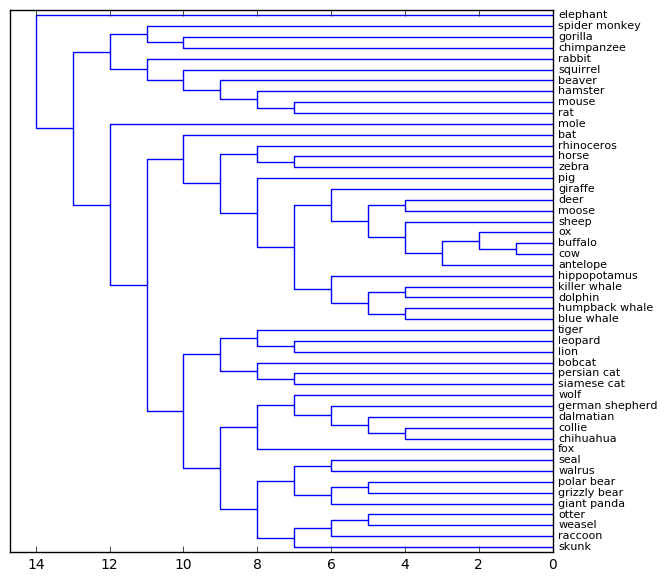

In [22]:
from scipy.cluster.hierarchy import dendrogram
plt.figure()
plt.gcf().set_size_inches(7, 7, forward=True)
_ = dendrogram(linkage, labels = animals, orientation = 'left', color_threshold = 0)